In [ ]:
# !pip install suite2p
# !pip install scanimage-tiff-reader
# !pip install -U scikit-image
# !pip install tiffile
# !pip install --upgrade scipy

## Calcium Imaging analysis

### Load required libraries

In [1]:
import os
import sys
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import math
# from skimage.viewer import ImageViewer
# import skimage
import importlib

# from tiffStacks import sciscanTiff
import tiffStacks as tst

/Users/angueyraaristjm/anaconda3/lib/python3.7/site-packages/skimage/viewer/utils/core.py:10: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  warn("Recommended matplotlib backend is `Agg` for full "


In [2]:
cd '/Users/angueyraaristjm/Documents/LiImaging/TwoPhoton/ChAT_gCaMP6s_example2/'

/Users/angueyraaristjm/Documents/LiImaging/TwoPhoton/ChAT_gCaMP6s_example2


In [107]:
colors = np.array([[0.91510904, 0.55114749, 0.67037311],
   [0.91696411, 0.55081563, 0.66264366],
   [0.91870995, 0.55055664, 0.65485881],
   [0.92034498, 0.55037149, 0.64702356],
   [0.92186763, 0.55026107, 0.63914306],
   [0.92327636, 0.55022625, 0.63122259],
   [0.9245696 , 0.55026781, 0.62326754],
   [0.92574582, 0.5503865 , 0.6152834 ],
   [0.92680349, 0.55058299, 0.6072758 ],
   [0.92774112, 0.55085789, 0.59925045],
   [0.9285572 , 0.55121174, 0.59121319],
   [0.92925027, 0.551645  , 0.58316992],
   [0.92981889, 0.55215808, 0.57512667],
   [0.93026165, 0.55275127, 0.56708953],
   [0.93057716, 0.5534248 , 0.55906469],
   [0.93076407, 0.55417883, 0.55105838],
   [0.93082107, 0.55501339, 0.54307696],
   [0.93074689, 0.55592845, 0.53512681],
   [0.9305403 , 0.55692387, 0.52721438],
   [0.93020012, 0.55799943, 0.51934621],
   [0.92972523, 0.55915477, 0.51152885],
   [0.92911454, 0.56038948, 0.50376893],
   [0.92836703, 0.56170301, 0.49607312],
   [0.92748175, 0.56309471, 0.48844813],
   [0.9264578 , 0.56456383, 0.48090073],
   [0.92529434, 0.56610951, 0.47343769],
   [0.92399062, 0.56773078, 0.46606586],
   [0.92254595, 0.56942656, 0.45879209],
   [0.92095971, 0.57119566, 0.4516233 ],
   [0.91923137, 0.5730368 , 0.44456642],
   [0.91736048, 0.57494856, 0.4376284 ],
   [0.91534665, 0.57692945, 0.43081625],
   [0.91318962, 0.57897785, 0.42413698],
   [0.91088917, 0.58109205, 0.41759765],
   [0.90844521, 0.58327024, 0.41120533],
   [0.90585771, 0.58551053, 0.40496711],
   [0.90312676, 0.5878109 , 0.3988901 ],
   [0.90025252, 0.59016928, 0.39298143],
   [0.89723527, 0.5925835 , 0.38724821],
   [0.89407538, 0.59505131, 0.38169756],
   [0.89077331, 0.59757038, 0.37633658],
   [0.88732963, 0.60013832, 0.37117234],
   [0.88374501, 0.60275266, 0.36621186],
   [0.88002022, 0.6054109 , 0.36146209],
   [0.87615612, 0.60811044, 0.35692989],
   [0.87215369, 0.61084868, 0.352622  ],
   [0.86801401, 0.61362295, 0.34854502],
   [0.86373824, 0.61643054, 0.34470535],
   [0.85932766, 0.61926872, 0.3411092 ],
   [0.85478365, 0.62213474, 0.3377625 ],
   [0.85010767, 0.6250258 , 0.33467091],
   [0.84530131, 0.62793914, 0.3318397 ],
   [0.84036623, 0.63087193, 0.32927381],
   [0.8353042 , 0.63382139, 0.32697771],
   [0.83011708, 0.63678472, 0.32495541],
   [0.82480682, 0.63975913, 0.32321038],
   [0.81937548, 0.64274185, 0.32174556],
   [0.81382519, 0.64573011, 0.32056327],
   [0.80815818, 0.6487212 , 0.31966522],
   [0.80237677, 0.65171241, 0.31905244],
   [0.79648336, 0.65470106, 0.31872531],
   [0.79048044, 0.65768455, 0.31868352],
   [0.78437059, 0.66066026, 0.31892606],
   [0.77815645, 0.66362567, 0.31945124],
   [0.77184076, 0.66657827, 0.32025669],
   [0.76542634, 0.66951562, 0.3213394 ],
   [0.75891609, 0.67243534, 0.32269572],
   [0.75231298, 0.67533509, 0.32432138],
   [0.74562004, 0.6782126 , 0.32621159],
   [0.73884042, 0.68106567, 0.32836102],
   [0.73197731, 0.68389214, 0.33076388],
   [0.72503398, 0.68668995, 0.33341395],
   [0.7180138 , 0.68945708, 0.33630465],
   [0.71092018, 0.69219158, 0.33942908],
   [0.70375663, 0.69489159, 0.34278007],
   [0.69652673, 0.69755529, 0.34635023],
   [0.68923414, 0.70018097, 0.35013201],
   [0.6818826 , 0.70276695, 0.35411772],
   [0.67447591, 0.70531165, 0.3582996 ],
   [0.667018  , 0.70781354, 0.36266984],
   [0.65951284, 0.71027119, 0.36722061],
   [0.65196451, 0.71268322, 0.37194411],
   [0.64437719, 0.71504832, 0.37683259],
   [0.63675512, 0.71736525, 0.38187838],
   [0.62910269, 0.71963286, 0.38707389],
   [0.62142435, 0.72185004, 0.39241165],
   [0.61372469, 0.72401576, 0.39788432],
   [0.60600841, 0.72612907, 0.40348469],
   [0.59828032, 0.72818906, 0.40920573],
   [0.59054536, 0.73019489, 0.41504052],
   [0.58280863, 0.73214581, 0.42098233],
   [0.57507535, 0.7340411 , 0.42702461],
   [0.5673509 , 0.7358801 , 0.43316094],
   [0.55964082, 0.73766224, 0.43938511],
   [0.55195081, 0.73938697, 0.44569104],
   [0.54428677, 0.74105381, 0.45207286],
   [0.53665478, 0.74266235, 0.45852483],
   [0.52906111, 0.74421221, 0.4650414 ],
   [0.52151225, 0.74570306, 0.47161718],
   [0.5140149 , 0.74713464, 0.47824691],
   [0.506576  , 0.74850672, 0.48492552],
   [0.49920271, 0.74981912, 0.49164808],
   [0.49190247, 0.75107171, 0.4984098 ],
   [0.48468293, 0.75226438, 0.50520604],
   [0.47755205, 0.7533971 , 0.51203229],
   [0.47051802, 0.75446984, 0.5188842 ],
   [0.46358932, 0.75548263, 0.52575752],
   [0.45677469, 0.75643553, 0.53264815],
   [0.45008317, 0.75732863, 0.5395521 ],
   [0.44352403, 0.75816207, 0.54646551],
   [0.43710682, 0.758936  , 0.55338462],
   [0.43084133, 0.7596506 , 0.56030581],
   [0.42473758, 0.76030611, 0.56722555],
   [0.41880579, 0.76090275, 0.5741404 ],
   [0.41305637, 0.76144081, 0.58104704],
   [0.40749984, 0.76192057, 0.58794226],
   [0.40214685, 0.76234235, 0.59482292],
   [0.39700806, 0.7627065 , 0.60168598],
   [0.39209414, 0.76301337, 0.6085285 ],
   [0.38741566, 0.76326334, 0.6153476 ],
   [0.38298304, 0.76345681, 0.62214052],
   [0.37880647, 0.7635942 , 0.62890454],
   [0.37489579, 0.76367593, 0.63563704],
   [0.37126045, 0.76370246, 0.64233547],
   [0.36790936, 0.76367425, 0.64899736],
   [0.36485083, 0.76359176, 0.6556203 ],
   [0.36209245, 0.76345549, 0.66220193],
   [0.359641  , 0.76326594, 0.66873999],
   [0.35750235, 0.76302361, 0.67523226],
   [0.35568141, 0.76272903, 0.68167659],
   [0.35418202, 0.76238272, 0.68807086],
   [0.3530069 , 0.76198523, 0.69441305],
   [0.35215761, 0.7615371 , 0.70070115],
   [0.35163454, 0.76103888, 0.70693324],
   [0.35143685, 0.76049114, 0.71310742],
   [0.35156253, 0.75989444, 0.71922184],
   [0.35200839, 0.75924936, 0.72527472],
   [0.3527701 , 0.75855647, 0.73126429],
   [0.3538423 , 0.75781637, 0.73718884],
   [0.3552186 , 0.75702964, 0.7430467 ],
   [0.35689171, 0.75619688, 0.74883624],
   [0.35885353, 0.75531868, 0.75455584],
   [0.36109522, 0.75439565, 0.76020396],
   [0.36360734, 0.75342839, 0.76577905],
   [0.36637995, 0.75241752, 0.77127961],
   [0.3694027 , 0.75136364, 0.77670417],
   [0.37266493, 0.75026738, 0.7820513 ],
   [0.37615579, 0.74912934, 0.78731957],
   [0.37986429, 0.74795017, 0.79250759],
   [0.38377944, 0.74673047, 0.797614  ],
   [0.38789026, 0.74547088, 0.80263746],
   [0.3921859 , 0.74417203, 0.80757663],
   [0.39665568, 0.74283455, 0.81243022],
   [0.40128912, 0.74145908, 0.81719695],
   [0.406076  , 0.74004626, 0.82187554],
   [0.41100641, 0.73859673, 0.82646476],
   [0.41607073, 0.73711114, 0.83096336],
   [0.4212597 , 0.73559013, 0.83537014],
   [0.42656439, 0.73403435, 0.83968388],
   [0.43197625, 0.73244447, 0.8439034 ],
   [0.43748708, 0.73082114, 0.84802751],
   [0.44308905, 0.72916502, 0.85205505],
   [0.44877471, 0.72747678, 0.85598486],
   [0.45453694, 0.72575709, 0.85981579],
   [0.46036897, 0.72400662, 0.8635467 ],
   [0.4662644 , 0.72222606, 0.86717646],
   [0.47221713, 0.72041608, 0.87070395],
   [0.47822138, 0.71857738, 0.87412804],
   [0.4842717 , 0.71671065, 0.87744763],
   [0.4903629 , 0.71481659, 0.88066162],
   [0.49649009, 0.71289591, 0.8837689 ],
   [0.50264864, 0.71094931, 0.88676838],
   [0.50883417, 0.70897752, 0.88965898],
   [0.51504253, 0.70698127, 0.89243961],
   [0.52126981, 0.70496128, 0.8951092 ],
   [0.52751231, 0.70291829, 0.89766666],
   [0.53376652, 0.70085306, 0.90011093],
   [0.54002912, 0.69876633, 0.90244095],
   [0.54629699, 0.69665888, 0.90465565],
   [0.55256715, 0.69453147, 0.90675397],
   [0.55883679, 0.69238489, 0.90873487],
   [0.56510323, 0.69021993, 0.9105973 ],
   [0.57136396, 0.68803739, 0.91234022],
   [0.57761655, 0.68583808, 0.91396258],
   [0.58385872, 0.68362282, 0.91546336],
   [0.59008831, 0.68139246, 0.91684154],
   [0.59630323, 0.67914782, 0.9180961 ],
   [0.60250152, 0.67688977, 0.91922603],
   [0.60868128, 0.67461918, 0.92023033],
   [0.61484071, 0.67233692, 0.921108  ],
   [0.62097809, 0.67004388, 0.92185807],
   [0.62709176, 0.66774097, 0.92247957],
   [0.63318012, 0.66542911, 0.92297153],
   [0.63924166, 0.66310923, 0.92333301],
   [0.64527488, 0.66078227, 0.92356308],
   [0.65127837, 0.65844919, 0.92366082],
   [0.65725076, 0.65611096, 0.92362532],
   [0.66319071, 0.65376857, 0.92345572],
   [0.66909691, 0.65142302, 0.92315115],
   [0.67496813, 0.64907533, 0.92271076],
   [0.68080311, 0.64672651, 0.92213374],
   [0.68660068, 0.64437763, 0.92141929],
   [0.69235965, 0.64202973, 0.92056665],
   [0.69807888, 0.6396839 , 0.91957507],
   [0.70375724, 0.63734122, 0.91844386],
   [0.70939361, 0.63500279, 0.91717232],
   [0.7149869 , 0.63266974, 0.91575983],
   [0.72053602, 0.63034321, 0.91420578],
   [0.72603991, 0.62802433, 0.9125096 ],
   [0.7314975 , 0.62571429, 0.91067077],
   [0.73690773, 0.62341425, 0.9086888 ],
   [0.74226956, 0.62112542, 0.90656328],
   [0.74758193, 0.61884899, 0.90429382],
   [0.75284381, 0.6165862 , 0.90188009],
   [0.75805413, 0.61433829, 0.89932181],
   [0.76321187, 0.6121065 , 0.89661877],
   [0.76831596, 0.6098921 , 0.89377082],
   [0.77336536, 0.60769637, 0.89077786],
   [0.77835901, 0.6055206 , 0.88763988],
   [0.78329583, 0.6033661 , 0.88435693],
   [0.78817477, 0.60123418, 0.88092913],
   [0.79299473, 0.59912616, 0.87735668],
   [0.79775462, 0.59704339, 0.87363986],
   [0.80245335, 0.59498722, 0.86977904],
   [0.8070898 , 0.592959  , 0.86577468],
   [0.81166284, 0.5909601 , 0.86162732],
   [0.81617134, 0.5889919 , 0.8573376 ],
   [0.82061414, 0.58705579, 0.85290625],
   [0.82499007, 0.58515315, 0.84833413],
   [0.82929796, 0.58328538, 0.84362217],
   [0.83353661, 0.58145389, 0.83877142],
   [0.8377048 , 0.57966009, 0.83378306],
   [0.8418013 , 0.57790538, 0.82865836],
   [0.84582486, 0.57619119, 0.82339871],
   [0.84977422, 0.57451892, 0.81800565],
   [0.85364809, 0.57289   , 0.8124808 ],
   [0.85744519, 0.57130585, 0.80682595],
   [0.86116418, 0.56976788, 0.80104298],
   [0.86480373, 0.56827749, 0.79513394],
   [0.86836249, 0.56683612, 0.789101  ],
   [0.87183909, 0.56544515, 0.78294645],
   [0.87523214, 0.56410599, 0.77667274],
   [0.87854024, 0.56282002, 0.77028247],
   [0.88176195, 0.56158863, 0.76377835],
   [0.88489584, 0.56041319, 0.75716326],
   [0.88794045, 0.55929505, 0.75044023],
   [0.89089432, 0.55823556, 0.74361241],
   [0.89375596, 0.55723605, 0.73668312],
   [0.89652387, 0.55629781, 0.72965583],
   [0.89919653, 0.55542215, 0.72253414],
   [0.90177242, 0.55461033, 0.71532181],
   [0.90425   , 0.55386358, 0.70802274],
   [0.90662774, 0.55318313, 0.70064098],
   [0.90890408, 0.55257016, 0.69318073],
   [0.91107745, 0.55202582, 0.68564633],
   [0.91314629, 0.55155124, 0.67804225]])

# cmap = np.col.ListedColormap(colors)
cmap = matplotlib.colors.ListedColormap(colors)

### Load tiff file and run registration

In [3]:
fpath = 'ChAT_gCaMP6s_example2';
fname = '20190520_L03_04Bars_Original';
ts = tst.sciscanTiff(fpath,fname);
# ts.histRescaled() # display z-average
# ts.runRegistration() #use suite2P to register stack

In [4]:
from ScanImageTiffReader import ScanImageTiffReader as sitr
from skimage.viewer import ImageViewer
from tifffile import TiffFile, imwrite, xml2dict
import skimage
from scipy import signal
from tqdm import tqdm_notebook
import importlib

# creating class method to analyze DS in tiff after registration

Still missing:
    - wrapper to calculate DS in all pixels after thresholding
    - subplot 1 is missing stimulus artifact, and could use annotate, theta and barLims to draw stimulus arrows
    - this could be done by using subthreshold pixels across image
    - plotter of DSI as image
    - a way to load the correct bar settings

In [130]:
class rgTiff:
    """Python loader for registered tiff stack"""
    def __init__(self, filepath, filename):
        ### directories and paths ###
        self.filepath = filepath + '/'
        self.filename = 'rg_' + filename # path for registered tiff
        self.basedir = '/Users/angueyraaristjm/Documents/LiImaging/TwoPhoton/' + self.filepath + "analysis/"
        self.loadpath = self.basedir + self.filename + ".tif"
        ### Load tif file
        self.tif = sitr(self.loadpath)
        ### Run default methods
        self.metadata = self.getMetadata()
        self.barSettings = self.getBarSettings()
        self.dsThreshold = 0
        self.dsR = []
        self.dsT = []
        self.peakInd = []
        

    def getDSimg(self):
        flatData = self.getData().reshape(self.metadata['Lt'],self.metadata['Ly'] * self.metadata['Lx']);
        peakInd = np.zeros([self.barSettings['nDirections'], self.metadata['Ly'] * self.metadata['Lx']], dtype=int);
        dsR = np.zeros(self.metadata['Ly'] * self.metadata['Lx'])
        dsT = np.zeros(self.metadata['Ly'] * self.metadata['Lx'])
        theta = self.barSettings['theta']
        for i in tqdm_notebook(range(self.metadata['Ly']*self.metadata['Lx'])):
#         for i in tqdm_notebook(range(self.metadata['Ly'])):
            peakInd[:,i] = self.findPeaks(flatData[:,i]);
            dsR[i], dsT[i] = tst.calcDS(flatData[peakInd[:,i],i], theta)
        self.dsR = dsR.reshape(self.metadata['Ly'], self.metadata['Lx'])
        self.dsT = dsT.reshape(self.metadata['Ly'], self.metadata['Lx'])
            
    
    def getBarSettings(self):
        # need easy way to pull this data. Save csv from Sy2? read from h5 file? Ovation to Matlab to csv?
        barSettings = {
            'sI' : 1/self.metadata['samplingRate'], #sampling interval
            'prefrm' : 120, # bars preframes
            'stmfrm' : 580, # bars stimframes
            'tailfrm' : 120, # bars postframes

            'nDirections' : 8, # number of bars
            'barW' : 68, # number of frames for a single bar
            'bar0' : 120, # frame index for first bar
            'barIBI' : 5, # inter-bar interval in frames

            'theta0' : 0, # angular direction of first bar
        }
        # bar directions assuming ordered presentation
        barSettings['theta'] = np.delete(np.mod(np.linspace(0+barSettings['theta0'],(2*np.pi)+barSettings['theta0'], num=barSettings['nDirections']+1),(2*np.pi)),-1)
        barSettings['barLims'] = np.multiply(range(barSettings['nDirections']+1),barSettings['barW'])+barSettings['bar0']
        barSettings['barLims'] = barSettings['barLims'] + np.multiply(range(barSettings['nDirections']+1),barSettings['barIBI'])
        # turning things from frames into seconds
        barSettings['barLimst'] = barSettings['barLims'] / self.metadata['samplingRate']
        barSettings['barWt'] = barSettings['barW'] / self.metadata['samplingRate']
        barSettings['barIBIt'] = barSettings['barIBI'] / self.metadata['samplingRate']
        return barSettings
    
    # CONVENIENCE
    def getMetadata(self):
        imgDescription = self.getImageDescription()
        metadata = {
            'Lt' : imgDescription['OME']['Image']['Pixels']['SizeT'],
            'Lx' : imgDescription['OME']['Image']['Pixels']['SizeX'],
            'Ly' : imgDescription['OME']['Image']['Pixels']['SizeY'],
            'nChannels' :  imgDescription['OME']['Image']['Pixels']['SizeC'],
            'realX' : np.multiply(imgDescription['OME']['StructuredAnnotations']['XMLAnnotation'][3]['Value']['ImagePhysicalDimensions']['PhysicalSizeX'],1e6), # in um
            'realY' : np.multiply(imgDescription['OME']['StructuredAnnotations']['XMLAnnotation'][3]['Value']['ImagePhysicalDimensions']['PhysicalSizeY'],1e6), # in um
            'realT' : imgDescription['OME']['StructuredAnnotations']['XMLAnnotation'][3]['Value']['ImagePhysicalDimensions']['PhysicalSizeT'], # in s
            'samplingRate' : 0,
            'cellBodyDiameterX': 0,
            'cellBodyDiameterY': 0,
        }
        metadata['samplingRate'] = np.divide(metadata['Lt'],metadata['realT'])
        metadata['cellBodyDiameterX'] = np.divide(metadata['Lx'],metadata['realX']) * 5
        metadata['cellBodyDiameterY'] = np.divide(metadata['Ly'],metadata['realY']) * 5
        return metadata
    
    def getImageDescription(self):
        imgDescription = xml2dict(self.tif.description(0))
        return imgDescription
    
    def getData(self):
        img = self.tif.data();
        return img
    
    def getTAxis(self):
        tAx = range(self.metadata['Lt']) / self.metadata['samplingRate']
        return tAx

    def findPeaks(self, data):
        filtData = self.filterData(data);
        peakInd = np.zeros([self.barSettings['nDirections']], dtype = int)
        tempData = np.array(filtData[self.barSettings['prefrm']:self.barSettings['prefrm']+self.barSettings['stmfrm']], copy=True) 
        for b in range(self.barSettings['nDirections']):
            peakInd[b] = np.argmax(tempData)
            tempData[peakInd[b]-round(self.barSettings['barW']*1.4/2):peakInd[b]+round(self.barSettings['barW']*1.4/2)]=0
            if peakInd[b] < self.barSettings['barW'] + self.barSettings['barIBI']:
                tempData[0:self.barSettings['barW'] + self.barSettings['barIBI']]=0
        peakInd = np.sort(peakInd)
        peakInd = peakInd + self.barSettings['prefrm']
        return peakInd.astype(int)
    
    def plotPeaks_single(self, y = 0, x = 0):
        data = self.getData()[:,y,x]
        fData = self.filterData(data);
        peakInd = self.findPeaks(data);
        dsR, dsT = tst.calcDS(fData[peakInd], self.barSettings['theta'])
        tAx = self.getTAxis();
#         tAx = np.arange(np.size(data));
        fig = plt.figure(figsize=(20, 8))
        ax = plt.subplot(1, 2, 1)
        plt.plot(tAx, fData, lw=2, c='b')
        for b in range(self.barSettings['nDirections']):
            rect = matplotlib.patches.Rectangle((self.barSettings['barLimst'][b],0),
                                                self.barSettings['barWt'],
                                                np.power(2,16),linewidth=1,edgecolor='none',facecolor='grey', alpha =.1)
            ax.add_patch(rect)
        plt.scatter(tAx[peakInd], fData[peakInd], s=40, c='m', zorder=1000)
#         plt.xlim([0,180])
        ax = plt.subplot(1, 2, 2, projection='polar')
        plt.polar(np.concatenate((self.barSettings['theta'],[self.barSettings['theta'][0]])), np.concatenate((fData[peakInd],[fData[peakInd][0]])), 'r-')
        # plt.arrow(0,0,self.calcDS(fData[peakInd],self.barSettings['theta']), head_width=.1, head_length=1, length_includes_head=True, head_starts_at_zero=True, fc='k', ec='k')
        
        plt.annotate("", xy=(0, 0), xytext=(dsT, dsR), arrowprops=dict(arrowstyle="<|-"))
        
    
    # these methods could go into tiffStack.py
    @staticmethod
    def filterData(data):
        bwf_poles, bwf_freq = signal.butter(4, .1, btype='low', analog=False, output='ba', fs=None) #butterworth filter
        filtData = signal.filtfilt(bwf_poles,bwf_freq,data)
#         print('test filtering across sampling frequencies')
        return filtData
    


(840, 128, 256)
[120 193 266 339 412 485 558 631 704]


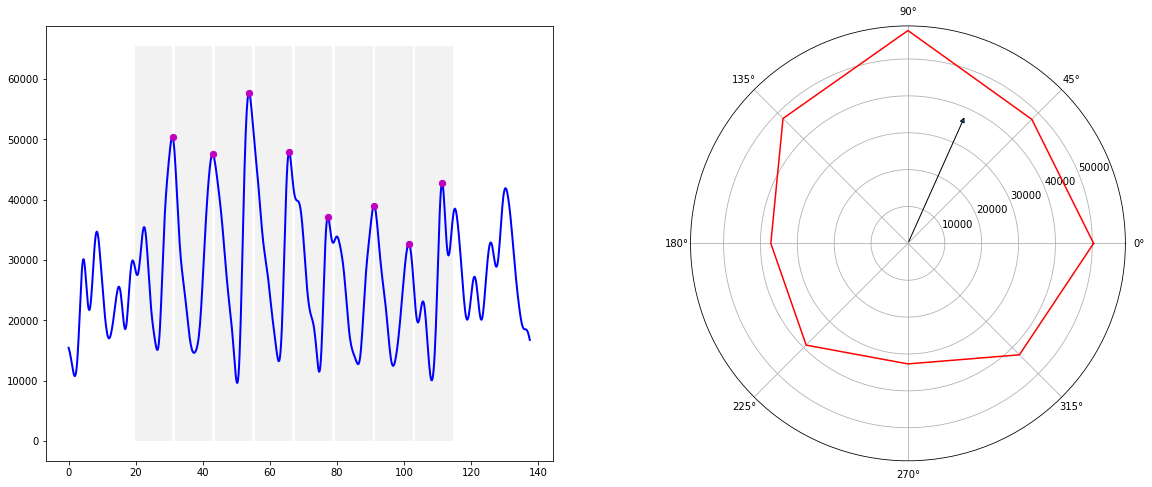

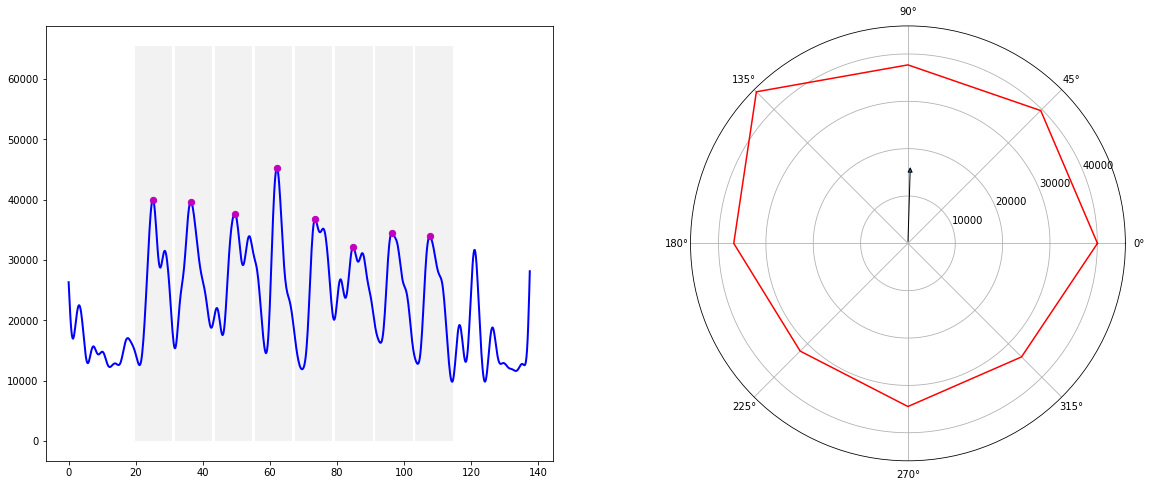

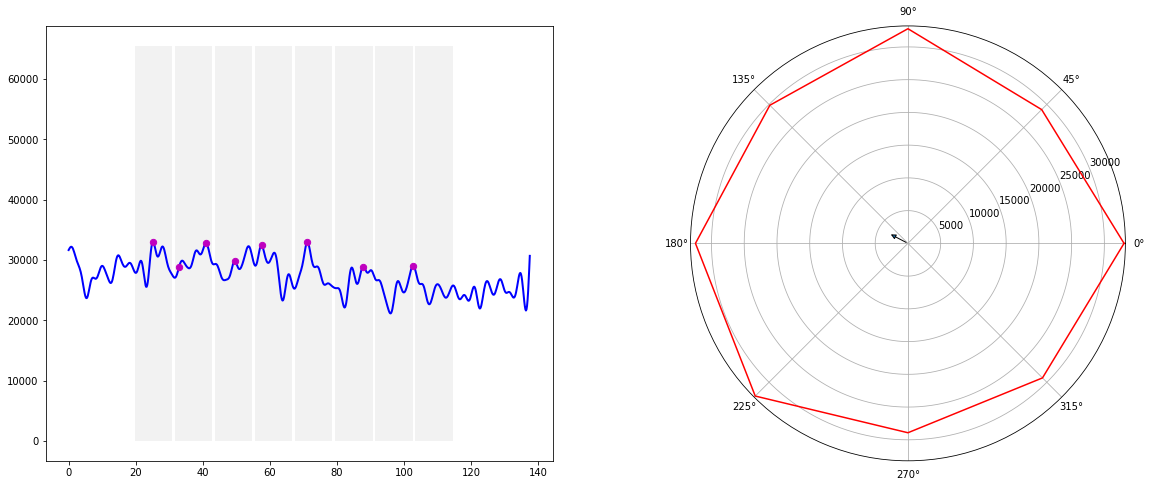

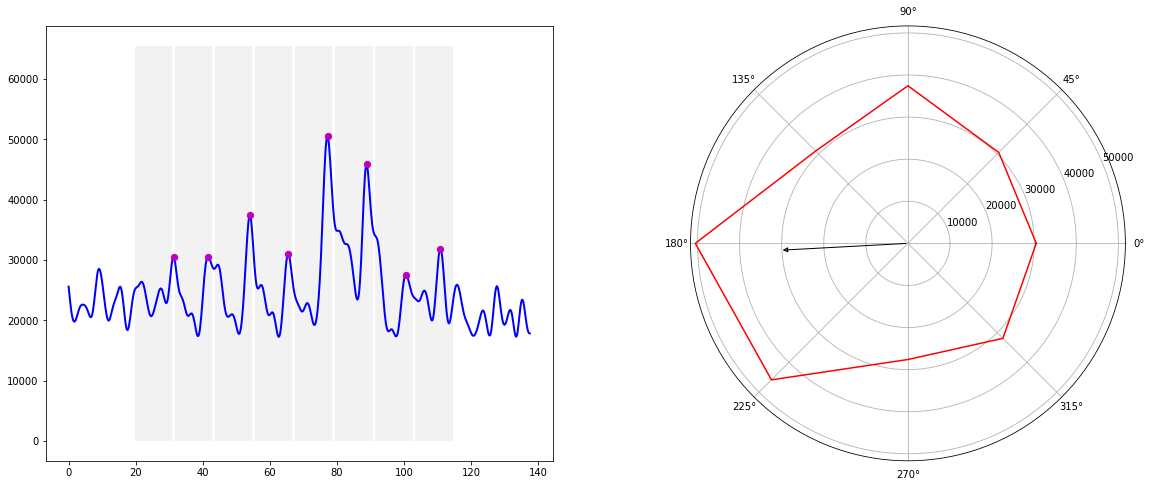

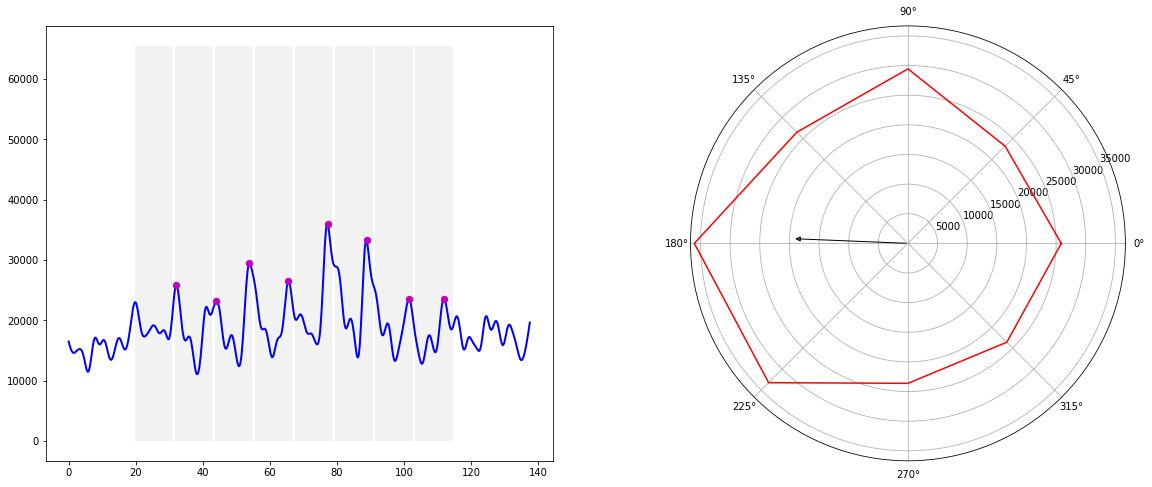

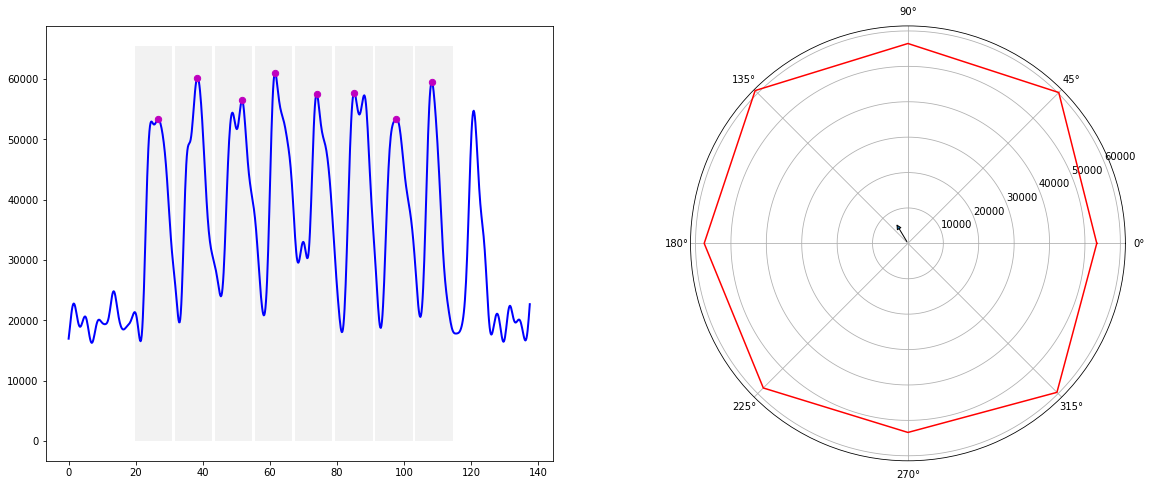

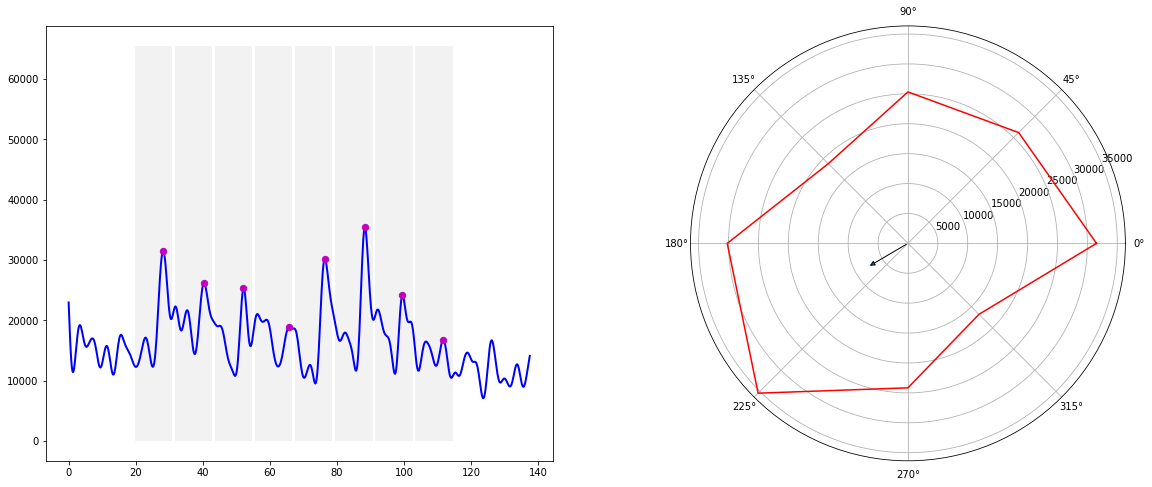

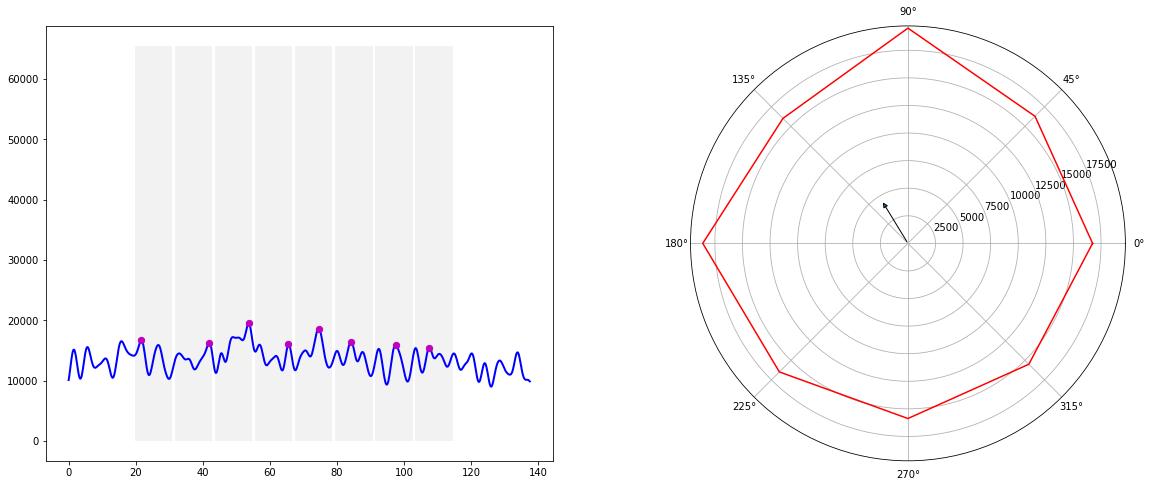

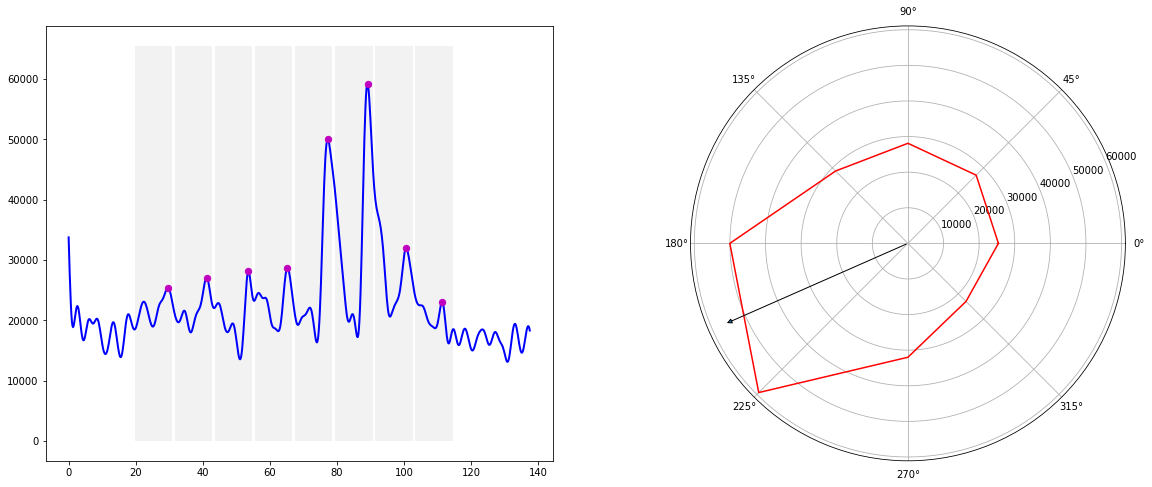

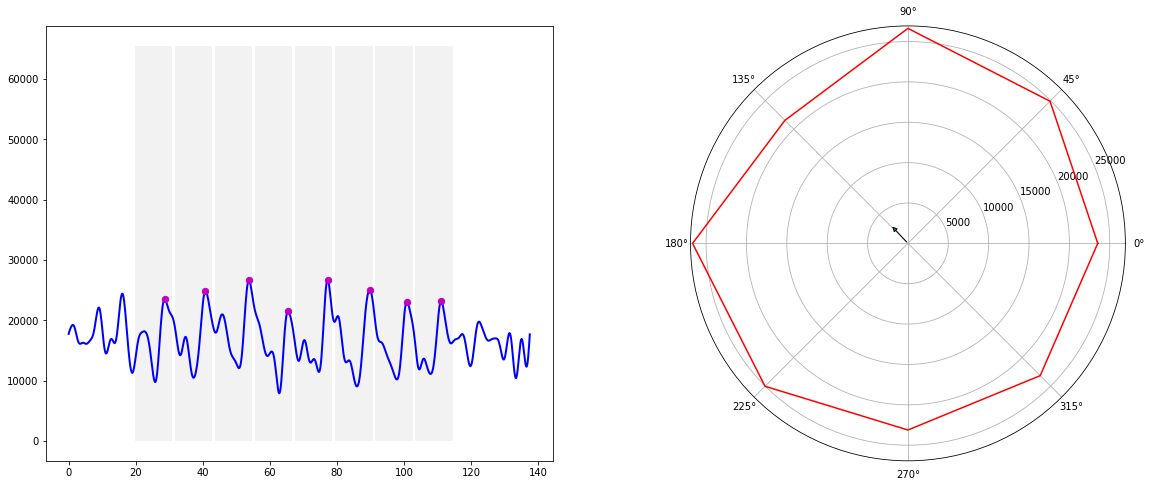

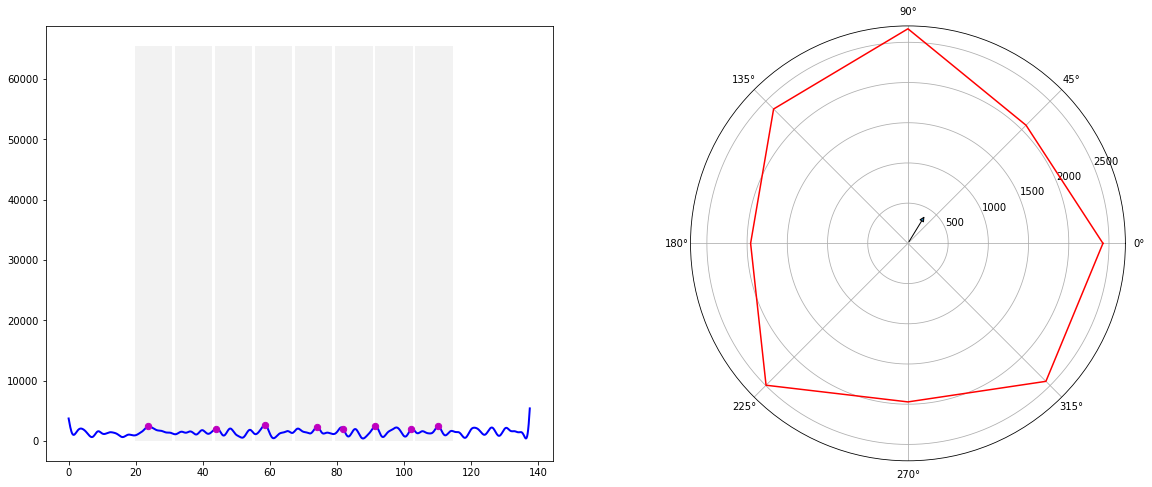

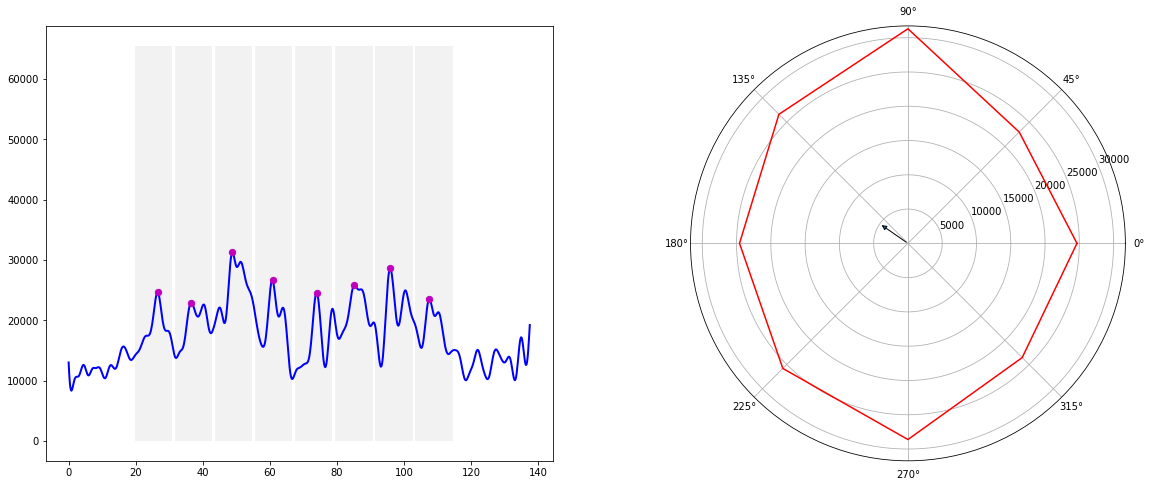

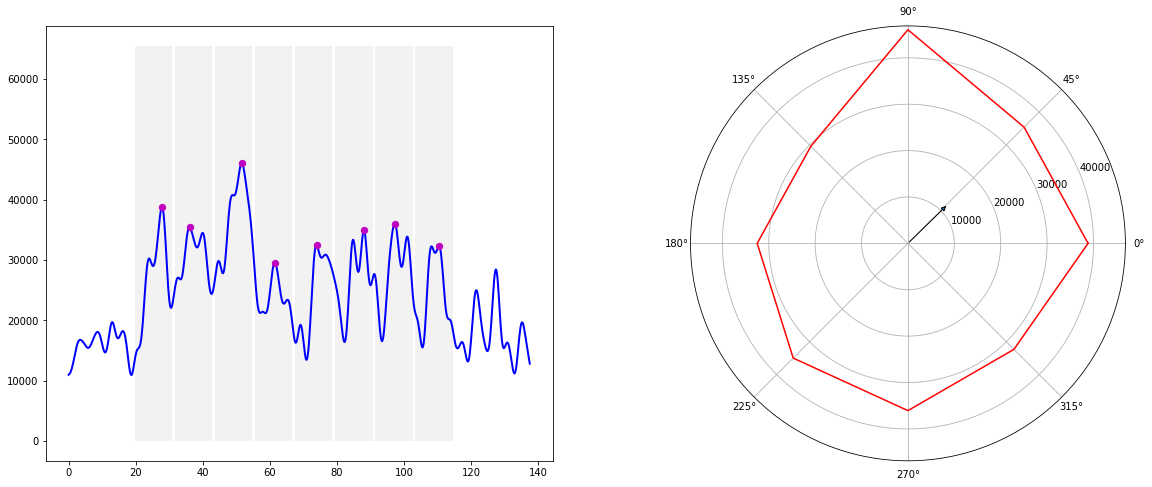

In [131]:
ts = rgTiff(fpath,fname)
print(np.shape(ts.getData()))
# importlib.reload(tst)
# ts.metadata['Lt'] #sampling interval
# ts.barSettings['theta'][1]
# ts.findPeaks(ts.getData()[:,98,78])
bS = ts.getBarSettings()
print(bS['barLims'])
ts.plotPeaks_single(y = 98, x = 78) # ON layer
ts.plotPeaks_single(y = 59, x = 88) # OFF layer
ts.plotPeaks_single(y = 66, x = 136) # big cell that would be TubD2(+)
ts.plotPeaks_single(y = 96, x = 31) # ON layer
ts.plotPeaks_single(y = 97, x = 30)
ts.plotPeaks_single(y = 56, x = 122)
ts.plotPeaks_single(y = 66, x = 203)
ts.plotPeaks_single(y = 70, x = 93)
ts.plotPeaks_single(y = 90, x = 90) # ON layer DS pixel
ts.plotPeaks_single(y = 98, x = 59)
ts.plotPeaks_single(y = 115, x = 78)
ts.plotPeaks_single(y = 55, x = 95)
ts.plotPeaks_single(y = 60, x = 97)

# ts.plotPeaks_single(y = 5, x = 5)
# ts.plotPeaks_single(y = 119, x = 246)


## Using cross correlation to get peaks

1. need to get template for detection
1. then use cross corealtion to get peak of lag
1. then lay down integration columns (&alpha; bar)

In [94]:
help(signal.butter)

Help on function butter in module scipy.signal.filter_design:

butter(N, Wn, btype='low', analog=False, output='ba', fs=None)
    Butterworth digital and analog filter design.
    
    Design an Nth-order digital or analog Butterworth filter and return
    the filter coefficients.
    
    Parameters
    ----------
    N : int
        The order of the filter.
    Wn : array_like
        A scalar or length-2 sequence giving the critical frequencies.
        For a Butterworth filter, this is the point at which the gain
        drops to 1/sqrt(2) that of the passband (the "-3 dB point").
    
        For digital filters, `Wn` are in the same units as `fs`.  By default,
        `fs` is 2 half-cycles/sample, so these are normalized from 0 to 1,
        where 1 is the Nyquist frequency.  (`Wn` is thus in
        half-cycles / sample.)
    
        For analog filters, `Wn` is an angular frequency (e.g. rad/s).
    btype : {'lowpass', 'highpass', 'bandpass', 'bandstop'}, optional
        The t

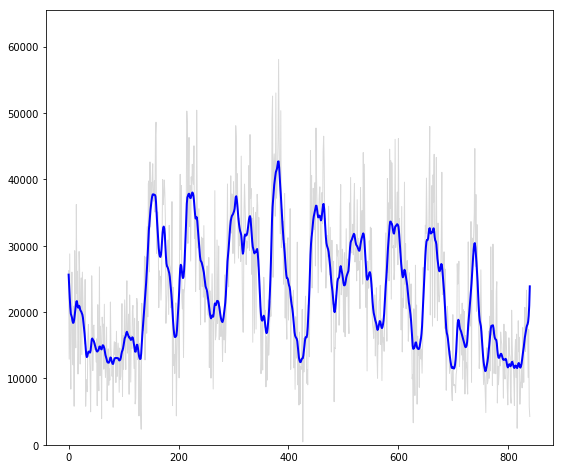

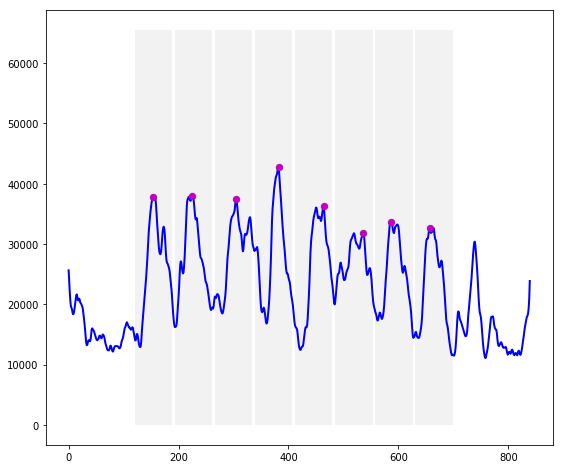

In [93]:
# y = 98; x = 78; # ON layer
y = 59; x = 88; # OFF layer
# y = 66; x = 136; # big cell that would be TubD2(+)
# y = 96; x = 31; # ON layer
# y = 90; x = 90; # ON layer
data = ts.getData()[:,y,x]
fData = ts.filterData(data);
tAx = ts.getTAxis();
tAx = np.arange(np.size(data));
fig = plt.figure(figsize=(20, 8))
ax = plt.subplot(1, 2, 1)
plt.plot(tAx, data, lw=1, c='k', alpha = .15)
plt.plot(tAx, fData, lw=2, c='b')
plt.ylim([0,np.power(2,16)])
# plt.xlim([400,600])




peakInd = ts.findPeaks(data);
fig = plt.figure(figsize=(20, 8))
ax = plt.subplot(1, 2, 1)
plt.plot(tAx, fData, lw=2, c='b')
for b in range(ts.barSettings['nDirections']):
    rect = matplotlib.patches.Rectangle((ts.barSettings['barLims'][b],0),
                                        ts.barSettings['barW'],
                                        np.power(2,16),linewidth=1,edgecolor='none',facecolor='grey', alpha =.1)
    ax.add_patch(rect)
plt.scatter(tAx[peakInd], fData[peakInd], s=40, c='m', zorder=1000)

## DS across image

In [48]:
ts = rgTiff(fpath,fname)

In [101]:
ts.getDSimg();

In [136]:
imgR = ts.dsR
imgT = np.degrees(ts.dsT)
mask = imgR > 20000
plt.figure(figsize=(24, 8))
ax = plt.subplot(1, 2, 1)
plt.imshow(imgR * mask)
plt.colorbar()
# plt.xlim(50,100)
# plt.ylim(90,110)
ax = plt.subplot(1, 2, 2)
# plt.imshow(imgT*mask, cmap = cmap)
# plt.imshow(imgT[mask])
plt.imshow(imgT*mask, cmap = 'twilight')
plt.colorbar()

TypeError: '>' not supported between instances of 'list' and 'int'

array([33045.00554802, 20538.92851946, 27614.19546635, ...,
       24165.13819295, 23031.92895967, 21488.7470127 ])

In [15]:
ts.dsT

array([[ 2.3105197 , -1.8376894 ,  0.05791482, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

#### TestPlotter

In [ ]:
fig = plt.figure(figsize=(20, 8))
ax = plt.subplot(1, 2, 1)
plt.plot(tAx[prepts:prepts+stmpts], aF[prepts:prepts+stmpts], lw=2, c='b')

In [ ]:
img = tst.getMean(ts.getData())
fig, ax = skimage.filters.try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

In [ ]:
help (math.cos)

https://math.stackexchange.com/questions/1365622/adding-two-polar-vectors


# DeBug explorations

In [ ]:
maskMul,maskOffset,cfRefImg = register.prepare_masks(refImg,ops)
refAndMasks = [maskMul,maskOffset,cfRefImg]
aligned_data, yshift, xshift, corrXY, yxnr = register.phasecorr(ts.rescale(), refAndMasks, ops)

In [ ]:
ts.plotHistogram(test_ops['refImg']);

In [ ]:
## Trying to ectract data from a single pixel, calculate DS and plot
# several methods to detect peaks failes

# metadata that is needed
sI = 1/ts.metadata['samplingRate']; #sampling interval
prepts = 120;
stmpts = 580;
tailpts = 120;

nDirections = 8;
barW = 68;
bar0 = 120; #bar0 = prepts;
barIBI = 5;

theta0 = 0;
theta = np.delete(np.mod(np.linspace(0+theta0,(2*np.pi)+theta0, num=nDirections+1),(2*np.pi)),-1)


# a = ts.getData()[:,57,123] # data ON example
# a = ts.getData()[:,61,79] # data
# a = ts.getData()[:,87,113] # data
a = ts.getData()[:,98,78] # data OFF example
# a = ts.getData()[:,120,78] # data NOISE example

c = ts.getData()[:,57,123] # data
b = tst.getTSeries(ts.getData()[:,104:128,226:256]) # stimulus artifact
bf_poles, bf_freq = signal.butter(1, .1, btype='low', analog=False, output='ba', fs=None) #butterworth filter
aF = signal.filtfilt(bf_poles, bf_freq,a)
cF = signal.filtfilt(bf_poles, bf_freq,c)
bF = signal.filtfilt(bf_poles, bf_freq,b)

tAx = ts.getTAxis();
tAx = np.arange(np.size(a));

fig = plt.figure(figsize=(20, 8))
ax = plt.subplot(1, 2, 1)

# plt.plot(tAx, a, lw=2)

plt.plot(tAx, aF, lw=2, c='b')
plt.plot(tAx, cF, lw=2, c='g', alpha=0.2)
plt.plot(tAx, tst.norm16bit(bF), lw=2, c=[0,0,0,.5], alpha=0.2)


barLims = np.multiply(range(nDirections+1),barW)+bar0
barLims = barLims + np.multiply(range(nDirections+1),barIBI)


# this method is fooled by photon noise
# peakInd = signal.find_peaks_cwt(aF[prepts:prepts+stmpts], np.ones(9)*15) 
# peakInd = peakInd + prepts
# this method is not robust in noisy pixels with little to no response
# peakInd, [] = signal.find_peaks(aF[prepts:prepts+stmpts], distance=60)
# peakInd = peakInd + prepts

for b in range(nDirections):
    rect = matplotlib.patches.Rectangle((barLims[b],0),barW,np.power(2,16),linewidth=1,edgecolor='none',facecolor='grey', alpha =.1)
    ax.add_patch(rect)

# probably best is just to find max for each bar presentation
peakInd = np.zeros([nDirections], dtype = int)
aTemp = np.array(aF[prepts:prepts+stmpts], copy=True) 
for b in range(nDirections):
#     # this algorithm is not robust to ON vs OFF
#     # peakInd[b] = np.argmax(aF[barLims[b]:barLims[b+1]])+barLims[b]
#     # iterative peak finding by blanking out data near peak
    peakInd[b] = np.argmax(aTemp)
    print(b, ':',peakInd[b])
    aTemp[peakInd[b]-round(barW/2):peakInd[b]+round(barW/2)]=0
    if peakInd[b] < barW + barIBI:
        aTemp[0:barW + barIBI]=0
#     plt.plot(tAx[prepts:prepts+stmpts], aTemp, lw=2, c='r', alpha = 1-b/nDirections)

# plt.xlim(100, 200)
peakInd = np.sort(peakInd)
peakInd = peakInd + prepts
print(peakInd)

plt.scatter(tAx[peakInd], aF[peakInd], s=40, c='m', zorder=1000)
# peakInd = signal.find_peaks_cwt(bF, np.ones(8)*10)
# plt.scatter(tAx[peakInd], tst.norm16bit(bF)[peakInd], s=40, c='k')
# plt.scatter(tAx[peakInd], tst.norm16bit(bF)[peakInd], s=40, c=np.array([0,0,0,0.5]))


ax = plt.subplot(1, 2, 2, projection='polar')
plt.polar(np.concatenate((theta,[theta[0]])), np.concatenate((aF[peakInd],[aF[peakInd][0]])), 'r-')
# for x, y in zip(theta, aF[peakInd]):
#     plt.polar(x, y, 'ro-')
vsR, vsT = vectorSum(aF[peakInd],theta);
# plt.polar(vsT,vsR,'ro')
# plt.arrow(0,0,vsT,vsR, head_width=.1, head_length=1, length_includes_head=True, head_starts_at_zero=True, fc='k', ec='k')
plt.annotate("", xy=(0, 0), xytext=(vsT, vsR), arrowprops=dict(arrowstyle="<|-"))
    

# w = skimage.morphology.watershed(bF[prepts:prepts:stmpts],markers=8)
# print(np.shape(w))
# skimage.morphology.watershed(image, markers=None, connectivity=1, offset=None, mask=None, compactness=0, watershed_line=False)